In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install --upgrade imbalanced-learn
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
      Successfully uninstalled imbalanced-learn-0.8.0
Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install imbalanced-learn==0.8.0

Defaulting to user installation because normal site-packages is not writeable
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.0
    Uninstalling imbalanced-learn-0.12.0:
      Successfully uninstalled imbalanced-learn-0.12.0


In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Reading Dataset
import pandas as pd
data = pd.read_csv('share fer2013_2brg.csv')
data.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [9]:
# Checking Shape of data
data.shape

(35887, 3)

# Data Visualization

In [10]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
label_to_text

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

In [11]:
import matplotlib.pyplot as plt

# Your plot code here

# Manually adjust layout if needed
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)


<Figure size 640x480 with 0 Axes>

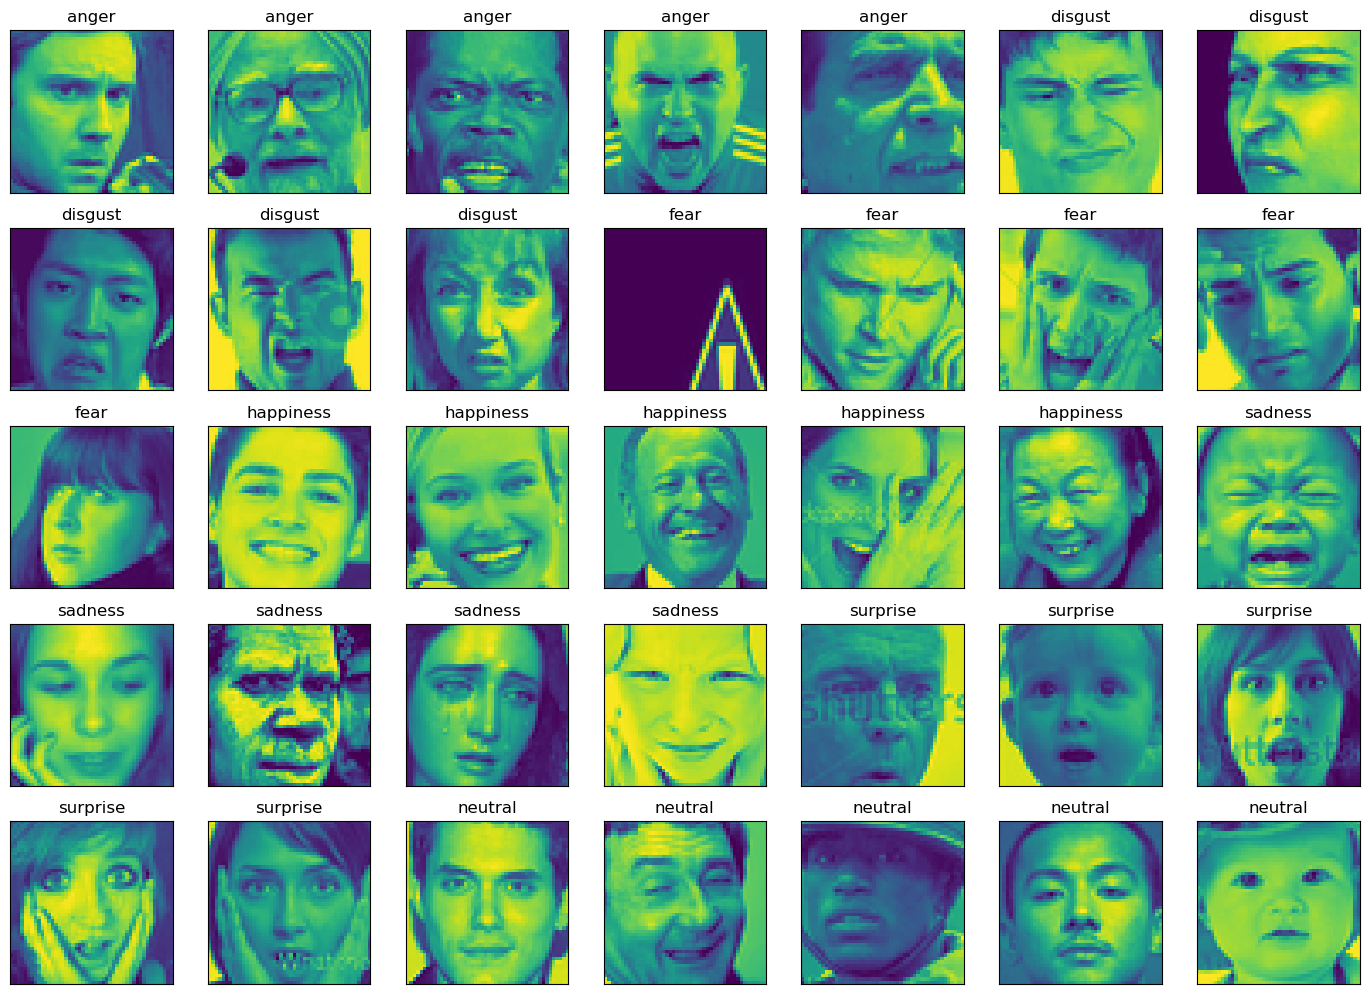

In [12]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(data.emotion.unique()):
    for j in range(5):
        px = data[data.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        plt.tight_layout()

In [13]:
# Checking Emotion Class Distribution
data['emotion'].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

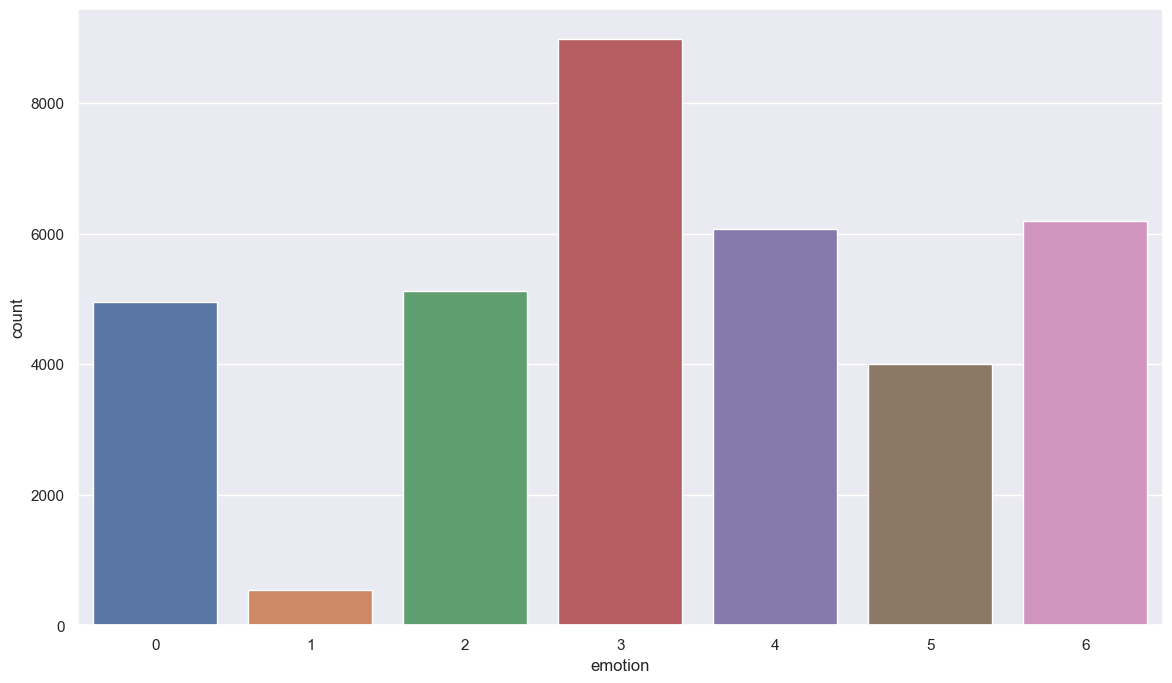

In [14]:
# Plotting the above distribution
plt.figure(figsize=(14, 8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

In [15]:
#From the above chart, we can observe that the data is highly imbalnace and for some emotions we have very small number of images, so we need to balnce the data by oversampling technique, so to that enough number of images for every emotions(class).

# Data Pre-processing (Balancing & Preparation)

In [16]:
# Split the data into feature & target variable
x_data = data['pixels']
y_data = data['emotion']

In [17]:
# Perform Random Over Sampling to balance the data
oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(62923, 1)   (62923,)


In [18]:
# Let's check the distributio of target data again after balancing
y_data.value_counts()

emotion
0    8989
2    8989
4    8989
6    8989
3    8989
5    8989
1    8989
Name: count, dtype: int64

In [19]:
x_data = pd.Series(x_data.flatten())
x_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    149 122 77 0 8 7 8 12 20 33 49 100 134 139 161...
62919    16 24 28 31 13 7 9 9 10 12 12 13 10 22 26 18 2...
62920    13 16 8 12 19 18 45 75 98 137 167 184 207 223 ...
62921    219 220 220 220 219 218 221 197 106 70 74 56 4...
62922    155 157 154 159 157 162 167 169 170 167 162 15...
Length: 62923, dtype: object

In [20]:
# Normalize the data
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data/= 255
x_data[:10]

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.3019608 , 0.30588236, 0.30980393, ..., 0.49019608, 0.2627451 ,
        0.26666668],
       [0.33333334, 0.32941177, 0.3529412 , ..., 0.22745098, 0.28627452,
        0.32941177],
       [1.        , 0.99607843, 1.        , ..., 0.99607843, 1.        ,
        1.        ]], dtype=float32)

In [21]:
# Reshaping
x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape

(62923, 48, 48, 1)

In [22]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(62923, 1)

In [23]:
# Split the data and create train-test set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 45)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((56630, 48, 48, 1), (6293, 48, 48, 1), (56630, 1), (6293, 1))

In [25]:
# Perform One-Hot Encoding on training data
y_train = to_categorical(y_train, 7)
y_train.shape

(56630, 7)

In [26]:
# Perform One-Hot Encoding on test data
y_test = to_categorical(y_test, 7)
y_test.shape

(6293, 7)

# Model Building

In [27]:
model = Sequential([
    # 1st Conv Layer
    Input((48, 48, 1)),
    Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Dropout(0.25),

    # 2nd Conv Layer
    Conv2D(64, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # 3rd Conv Layer
    Conv2D(64, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Dropout(0.25),

    # 4th Conv Layer
    Conv2D(128, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # 5th Conv Layer
    Conv2D(128, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # Flattening the Layer
    Flatten(),

    # Hidden Layer
    Dense(250, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(7, activation = 'softmax')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 46, 46, 32)        0         
                                                                 
 dropout (Dropout)           (None, 46, 46, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 46, 46, 64)        256       
 chNormalization)                                       

# Model Training

In [29]:
# Install Graphviz (follow the instructions for your OS)
# Download: https://graphviz.gitlab.io/download/

# Install the graphviz Python package
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [30]:
!pip install pydot
from tensorflow.keras.utils import plot_model

# Assuming your model is named 'model'
plot_model(model, to_file="fer2013_2brg.png", show_shapes=True, show_dtype=True)

Defaulting to user installation because normal site-packages is not writeable
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [31]:
# Assuming you have an appropriate optimizer, loss, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Train the Model
history = model.fit(x_train, y_train, epochs = 45 ,validation_data=(x_test, y_test))

Epoch 1/45
1770/1770 [==============================] - 482s 272ms/step - loss: 0.5789 - accuracy: 0.7851 - val_loss: 0.7203 - val_accuracy: 0.7685
Epoch 2/45
1770/1770 [==============================] - 450s 254ms/step - loss: 0.5504 - accuracy: 0.7956 - val_loss: 0.7175 - val_accuracy: 0.7758
Epoch 3/45
1770/1770 [==============================] - 449s 254ms/step - loss: 0.5251 - accuracy: 0.8068 - val_loss: 0.7829 - val_accuracy: 0.7640
Epoch 4/45
1770/1770 [==============================] - 454s 257ms/step - loss: 0.4995 - accuracy: 0.8159 - val_loss: 0.7833 - val_accuracy: 0.7650
Epoch 5/45
1770/1770 [==============================] - 478s 270ms/step - loss: 0.4868 - accuracy: 0.8231 - val_loss: 0.7290 - val_accuracy: 0.7842
Epoch 6/45
1770/1770 [==============================] - 477s 269ms/step - loss: 0.4636 - accuracy: 0.8310 - val_loss: 0.7366 - val_accuracy: 0.7982
Epoch 7/45
1770/1770 [==============================] - 464s 262ms/step - loss: 0.4493 - accuracy: 0.8372 - val_

# Model Evaluation

In [35]:
print("Accuracy of our model on test data : " , model.evaluate(x_test, y_test)[1]*100 , "%")
print("Loss of our model on test data : " , model.evaluate(x_test, y_test)[0])

197/197 [==============================] - 13s 64ms/step - loss: 0.8348 - accuracy: 0.8476
Accuracy of our model on test data :  84.76084470748901 %
197/197 [==============================] - 13s 65ms/step - loss: 0.8348 - accuracy: 0.8476
Loss of our model on test data :  0.8348025679588318


#The test accuracy & loss of our model is 84.76% & 0.834 respectively, which is better than many exsited state-of-the-art results.

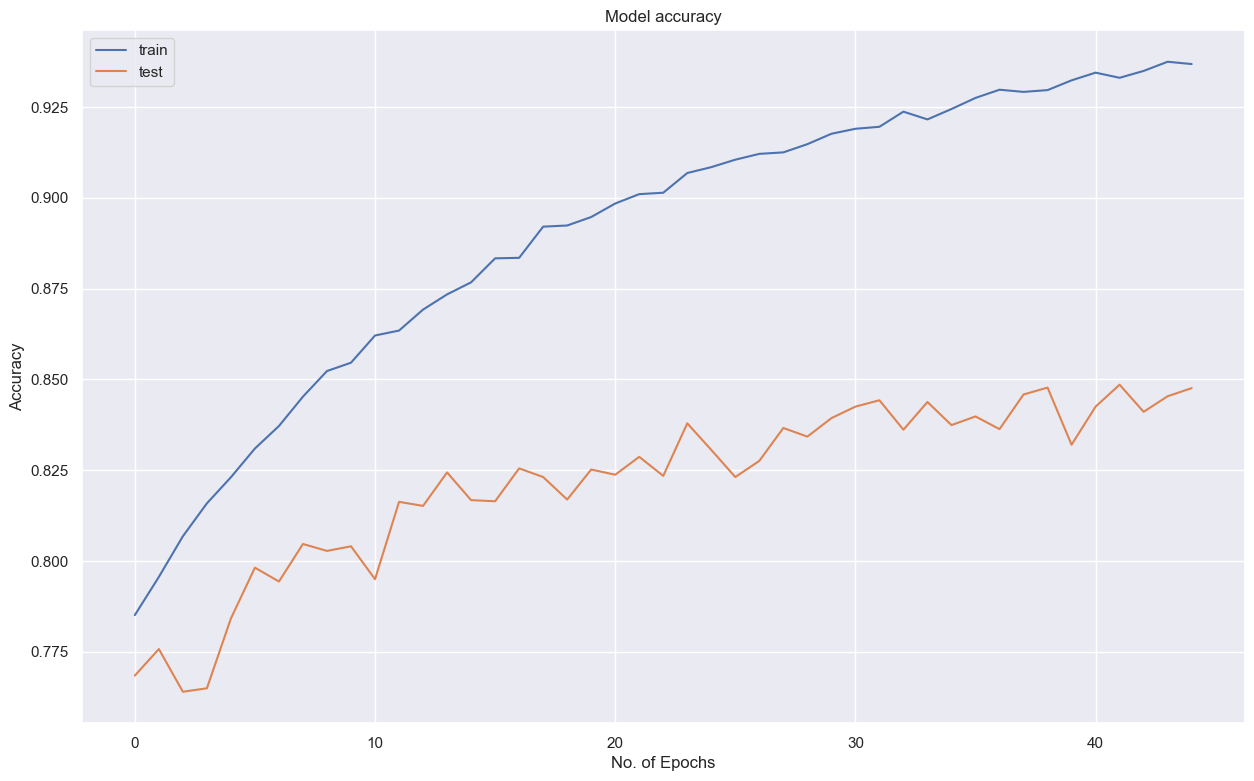

In [36]:
plt.figure(figsize=(15, 9))

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

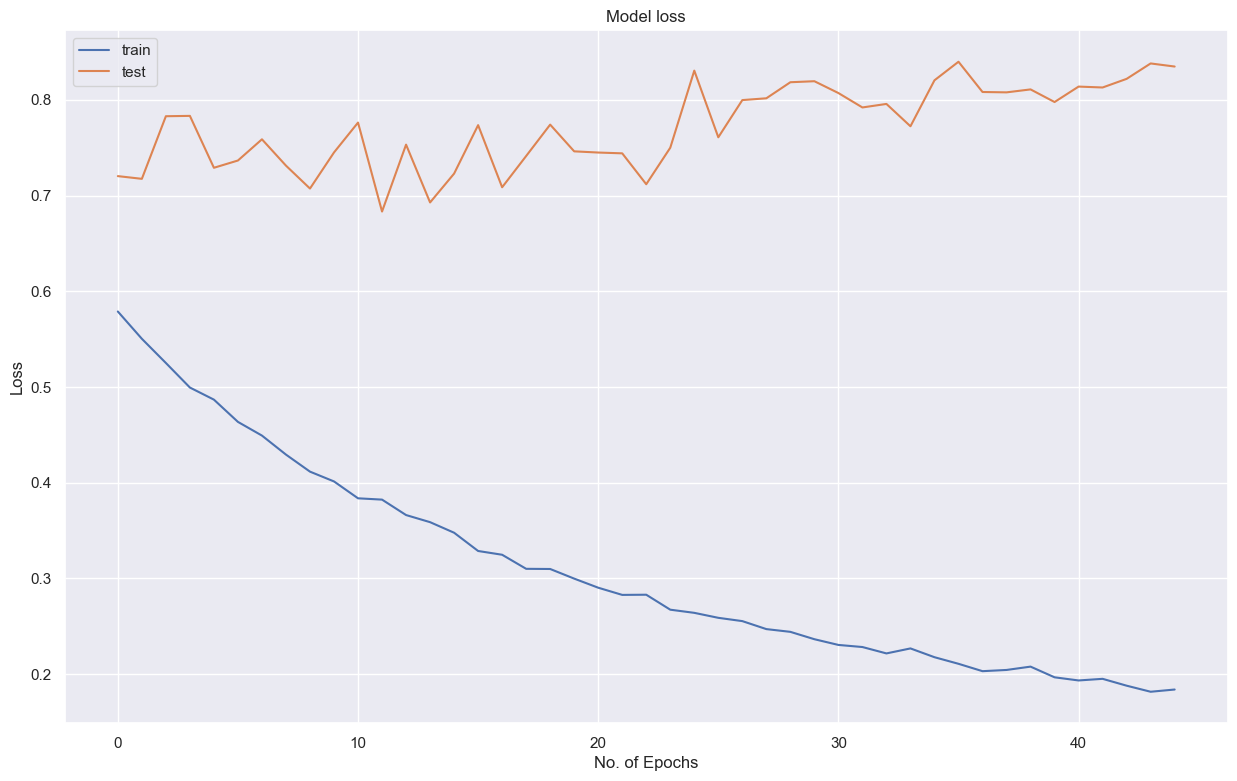

In [37]:
plt.figure(figsize=(15, 9))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Getting Classification Report & Plotting Confusion Matrix

In [38]:
# Making Predictio on Test Data
y_pred = model.predict(x_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

197/197 [==============================] - 8s 41ms/step


[6, 5, 3, 6, 1, 0, 3, 4, 1, 2]

In [39]:
y_actual = []

for pred in y_test:
    y_actual.append(np.argmax(pred))
y_actual[:10]

[6, 5, 5, 6, 1, 0, 3, 4, 1, 3]

In [40]:
# Getting Classification Report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_result))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       935
           1       1.00      1.00      1.00       895
           2       0.83      0.80      0.81       880
           3       0.88      0.83      0.85       906
           4       0.71      0.74      0.72       888
           5       0.94      0.95      0.95       869
           6       0.73      0.80      0.77       920

    accuracy                           0.85      6293
   macro avg       0.85      0.85      0.85      6293
weighted avg       0.85      0.85      0.85      6293



Text(179.75, 0.5, 'Truth')

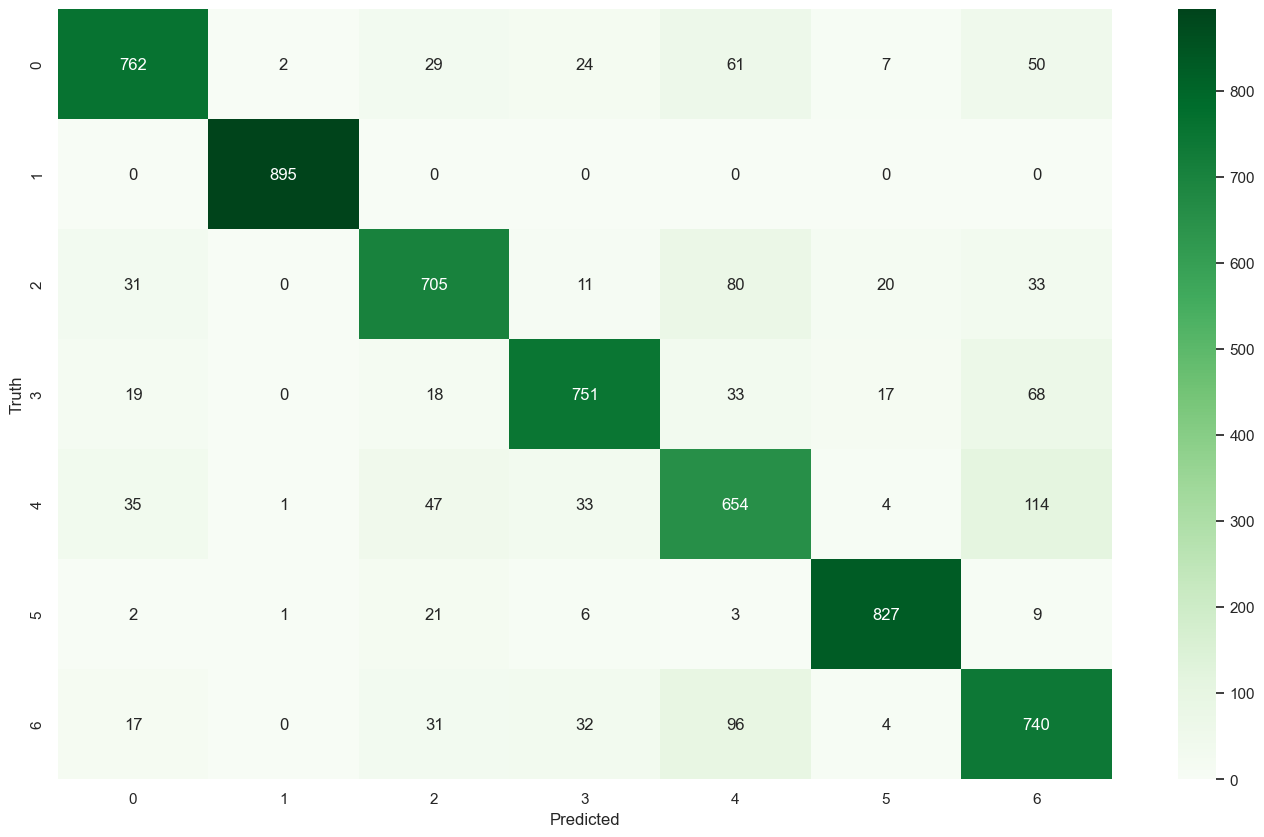

In [41]:
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

plt.figure(figsize = (17, 10))
sns.heatmap(cm, annot = True, fmt = 'd', cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Save the Model

In [42]:
# Save the Model
model.save("fer2013_08.hdf5")

In [43]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer2013_08.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer2013_08.h5")

In [ ]:
image = r"C:\Users\akash\Downloads\pexels-andrea-piacquadio-774095.jpg"
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

# Making Prediction on Image upload

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json


label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

# load json and create model
json_file = open('emotion_model2525.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model2525.h5")
print("Loaded model from disk")

# read the image
image_path = r"C:\Users\akash\Downloads\pexels-andrea-piacquadio-789822.jpg"
frame = cv2.imread(image_path)

# resize the frame if needed
frame = cv2.resize(frame, (1280, 720))

while True:
    # Find haar cascade to draw bounding box around face
    # ret, frame = cap.read()  # Commented out as we are using an image
    if frame is None:
        break
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available in the image
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0,255,0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, label_to_text[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)


    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

    cv2.destroyAllWindows()


Loaded model from disk
1/1 [==============================] - 0s 134ms/step


In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json


label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

# load json and create model
json_file = open('emotion_model2525.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model2525.h5")
print("Loaded model from disk")

# read the image
image_path = r"C:\Users\akash\Downloads\an.jpg"
frame = cv2.imread(image_path)

# resize the frame if needed
frame = cv2.resize(frame, (1280, 720))

while True:
    # Find haar cascade to draw bounding box around face
    # ret, frame = cap.read()  # Commented out as we are using an image
    if frame is None:
        break
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available in the image
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0,255,0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, label_to_text[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)


    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

    cv2.destroyAllWindows() 

Loaded model from disk
1/1 [==============================] - 0s 140ms/step


In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json


label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

# load json and create model
json_file = open('emotion_model2525.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model2525.h5")
print("Loaded model from disk")

# read the image
image_path = r"C:\Users\akash\Downloads\istockphoto-1043260742-1024x1024.jpg"
frame = cv2.imread(image_path)

# resize the frame if needed
frame = cv2.resize(frame, (1280, 720))

while True:
    # Find haar cascade to draw bounding box around face
    # ret, frame = cap.read()  # Commented out as we are using an image
    if frame is None:
        break
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available in the image
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0,255,0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, label_to_text[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)


    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

    cv2.destroyAllWindows() 

Loaded model from disk
1/1 [==============================] - 0s 382ms/step


# Making Prediction on video upload

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json


label_to_text = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('emotion_model2525.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model2525.h5")
print("Loaded model from disk")

# start the webcam feed
#cap = cv2.VideoCapture(0)

# pass here your video path
# you may download one from here : https://www.pexels.com/video/three-girls-laughing-5273028/
cap = cv2.VideoCapture(r"C:\Users\akash\Downloads\istockphoto-1469887930-640_adpp_is.mp4")

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, label_to_text[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Loaded model from disk
1/1 [==============================] - 0s 47ms/step


In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json


label_to_text = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('emotion_model2525.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model2525.h5")
print("Loaded model from disk")

# start the webcam feed
#cap = cv2.VideoCapture(0)

# pass here your video path
# you may download one from here : https://www.pexels.com/video/three-girls-laughing-5273028/
cap = cv2.VideoCapture(r"C:\Users\akash\Downloads\video (2160p).mp4")

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, label_to_text[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Loaded model from disk
1/1 [==============================] - 0s 16ms/step


# Making Prediction in a Real-Time

In [ ]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

#load model
model = model_from_json(open("fer2013_08.json", "r").read())
#load weights
model.load_weights('fer2013_08.h5')


face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y-50), (x+w,y+h+10), (0,255,0), 4)
        roi_gray=gray_img[y:y+h,x:x+w]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0]) 

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

1/1 [==============================] - 0s 38ms/step
